In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
from matplotlib.colors import ListedColormap
sns.set()
colors = sns.color_palette("husl")

In [2]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## 决策树分类

In [19]:
dt = DecisionTreeClassifier(max_depth=2)
knn = KNeighborsClassifier()
lr = LogisticRegression()

In [20]:
from sklearn.datasets import load_iris

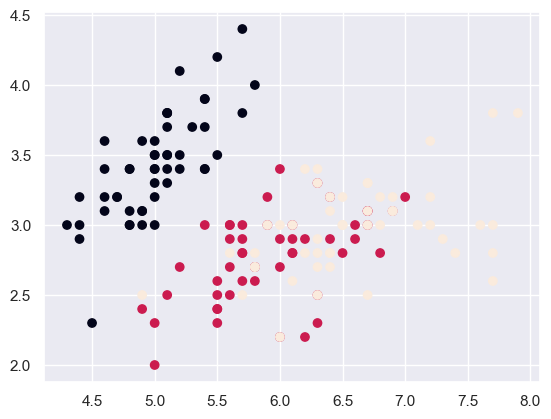

In [21]:
data,target = load_iris(return_X_y=True)
plt.scatter(data[:,0],data[:,1],c=target)

In [22]:
train = data[:,:2]

In [23]:
dt.fit(train,target)
knn.fit(train,target)
lr.fit(train,target)

LogisticRegression()

In [24]:
xmin,xmax = train[:,0].min(),train[:,0].max()
ymin,ymax = train[:,1].min(),train[:,1].max()

X = np.linspace(xmin,xmax,150)
y = np.linspace(ymin,ymax,150)

XX,yy = np.meshgrid(X,y)

X_test = np.c_[XX.ravel(),yy.ravel()]

In [25]:
result = {
    "DT":dt.predict(X_test),
    "KNN":knn.predict(X_test),
    "LR":lr.predict(X_test)
}

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


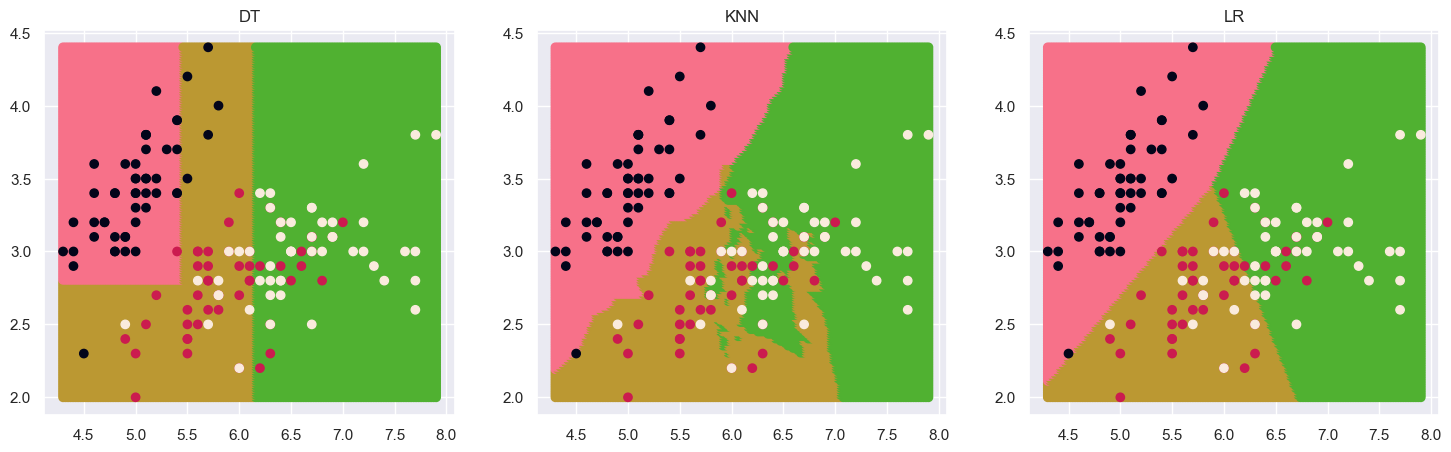

In [26]:
plt.figure(figsize=(18,5))

cm = ListedColormap(colors[:3])
location = 0
for k,v in result.items():
    location += 1
    ax = plt.subplot(1,3,location)
    ax.scatter(X_test[:,0],X_test[:,1],c=v,cmap=cm)
    ax.scatter(train[:,0],train[:,1],c=target)
    ax.set_title(k)

In [30]:
from sklearn import tree

In [38]:
load_iris().target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

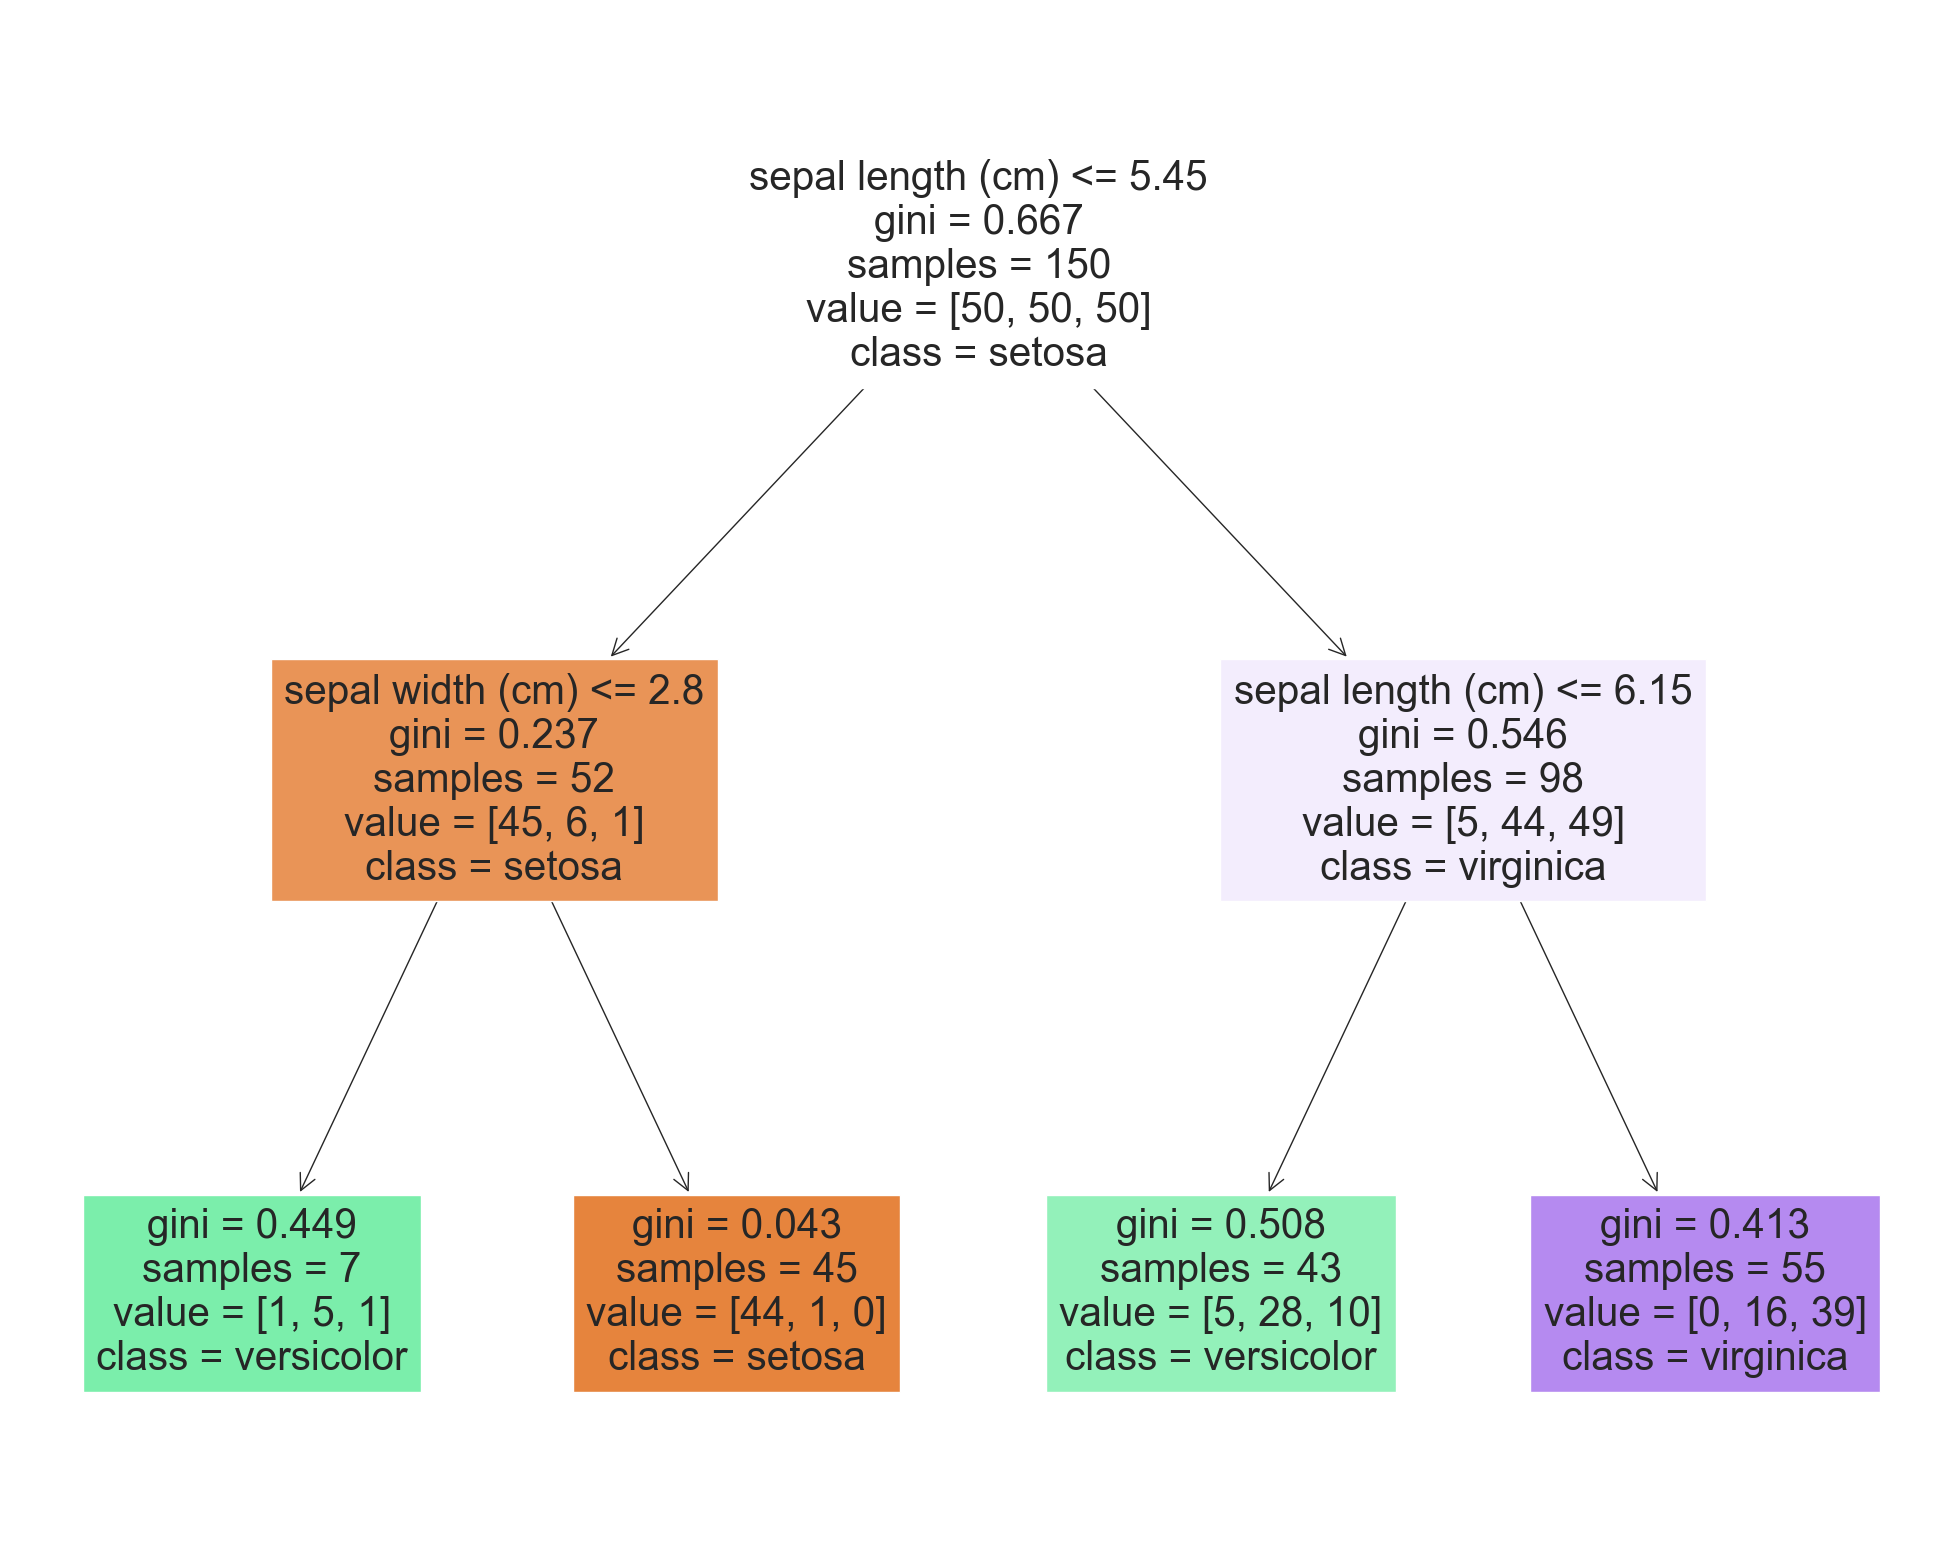

In [41]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    dt, 
    feature_names=load_iris().feature_names[:2],  
    class_names=load_iris().target_names,
    filled=True
)

## 决策树回归

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
tip = sns.load_dataset('tips')
tip

URLError: <urlopen error [Errno 61] Connection refused>